# __Capstone_Project - Spring 2021__
## Student Name: Michael Franklin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SETUP: Some Helper Functions that will be useful later

# Train KMeans using passed data and k amount of clusters
# Returns trained model
from sklearn.cluster import KMeans
def KMenasTrain(data,k=5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    # score the algorithm
    print("Score:",kmeans.score(data),"with a k of",k)
    return kmeans

# shows the silhouetee scores of passed k range (1 - 30) using passed data
from sklearn.metrics import silhouette_score
def GetSilScoresKmeans(data, kRange = range(1,31)):
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(trainData)
                    for k in kRange]
    
    # and lets get those score per 
    silhouette_scores = [silhouette_score(data, model.labels_)
                         for model in kmeans_per_k[1:]]

    # show best ks
    for i in range(len(silhouette_scores)):
        if (silhouette_scores[i] >= 0):
            print("Score:",silhouette_scores[i],"using k:",i+2)
            
# functions for correlation mapping (found from Kraggle:)
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

# with my own tweaks to allow drawing of rectangle markers and
# nonmatching correlation matrix dimensions

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}
    if marker == 'r':
        sz = 0
        mkr = 's'
    else:
        sz = [value_to_size(v) for v in size]
        mkr = marker
        
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=mkr,
        s=sz,
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    
    # Add rectangles if marker = 'r'
    if marker == 'r':
        for a_x, a_y, color, si, val in zip(*[[x_to_num[v] for v in x],
                                           [y_to_num[v] for v in y],
                                           [value_to_color(v) for v in color],
                                           [value_to_size(v) for v in size],
                                           color]):
            width = (si/size_scale)
            height = (si/size_scale)
            ax.add_patch(Rectangle(
                xy=(a_x-width/2, a_y-height/2) ,width=width, height=height,
                linewidth=1, color=color, fill=True))
            ax.annotate('%.2f'%(val), (a_x,a_y), ha="center", va="center")
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
        
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.index,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )
    


In [3]:
# import raw data
rawData = pd.read_csv( "Healthcare Providers.csv")
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
# let's do some exploring
# is this national provider ID unique?
len(rawData[rawData.columns.values[1]].unique())

89508

In [5]:
# it looks like a category, what makes it unique category?
ids = rawData[rawData.columns.values[1]]
rawData[ids.isin(ids[ids.duplicated()])].sort_values(rawData.columns.values[1])

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
366,668,1003003856,SANTIAGO,CYNTHIA,NaN,M.D.,F,I,5 ROOSEVELT AVE,NaN,...,90670,Pneumococcal vaccine for injection into muscle,Y,48,48,48,175,175,171.5,171.5
29965,681,1003003856,SANTIAGO,CYNTHIA,NaN,M.D.,F,I,5 ROOSEVELT AVE,NaN,...,G0402,Initial preventive physical examination; face-...,N,19,19,19,193.50421053,200,189.63684211,165.3
10455,660,1003003856,SANTIAGO,CYNTHIA,NaN,M.D.,F,I,5 ROOSEVELT AVE,NaN,...,81002,"Urinalysis, manual test",N,33,26,33,3.5,10,3.43,3.43
85698,2224,1003013657,SPINALE,RICHARD,C,DO,M,I,6255 INKSTER RD,SUITE 207,...,45378,Diagnostic examination of large bowel using an...,N,36,35,36,185.29805556,440,130.02555556,133.99
81415,2228,1003013657,SPINALE,RICHARD,C,DO,M,I,6255 INKSTER RD,SUITE 207,...,99202,"New patient office or other outpatient visit, ...",N,108,108,108,73.07,100,45.808240741,49.881111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72874,9843662,1992967699,SCAPPATICCI,ALBERT,A,MD,M,I,593 EDDY ST,NaN,...,32555,Removal of fluid from chest cavity with imagin...,N,12,12,12,119.32,416.25,91.68,91.45
14618,9843719,1992967731,GAVILANES,EDISON,G,MD,M,I,56-45 MAIN STREET,NaN,...,94060,Measurement and graphic recording of the amoun...,N,16,15,16,72.16,184.871875,55.45,48.4
78961,9843727,1992967731,GAVILANES,EDISON,G,MD,M,I,56-45 MAIN STREET,NaN,...,99291,Critical care delivery critically ill or injur...,N,806,345,806,255.87,643.92148883,196.33062035,177.64828784
21646,9844825,1992976146,HUANG,HARRY,H,M.D.,M,I,5630 SHIELDS DR,NaN,...,92250,Photography of the retina,N,"2,373","2,339","2,373",74.770897598,151,56.940990308,48.862869785


In [6]:
# it seems that the NP ID is an id for all of the provider columns, this
# could be useful for trimming data later on if need be
# the HCPCS Codes are what seperate duplicate NP IDs

# for now lets just clean everything
NonNullData = rawData.copy()
# remove index columsn as its unique on every row
NonNullData = NonNullData.drop("index",axis=1)
# let's replace all the nulls
NonNullData[NonNullData.columns.values[4]] = NonNullData[NonNullData.columns.values[4]].fillna("None")
NonNullData = NonNullData.fillna("N/A")
NonNullData.isna().sum()

National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
Street Address 2 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Co

In [7]:
# most of the last rows should be numarical but they are not, lets fix that
colNames = []
for i in range(19, 26):
    colName = NonNullData.columns.values[i]
    colNames.append(colName)
    NonNullData[colName].replace(",","",regex=True,inplace=True)
    NonNullData[colName] = pd.to_numeric(NonNullData[colName], downcast="float")
    
NonNullData["Zip Code of the Provider"] = pd.to_numeric(NonNullData["Zip Code of the Provider"], downcast="integer")
NonNullData["Zip Code of the Provider"] = NonNullData["Zip Code of the Provider"].apply(str)
NonNullData["National Provider Identifier"] = NonNullData["National Provider Identifier"].apply(str)
NonNullData[NonNullData.columns.values[range(19,26)]].select_dtypes(include=[np.number])

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27.0,24.0,27.0,200.587784,305.211121,157.262222,160.908890
1,175.0,175.0,175.0,123.730003,548.799988,118.830002,135.315262
2,32.0,13.0,32.0,90.650002,155.000000,64.439690,60.595936
3,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057575
...,...,...,...,...,...,...,...
99995,20.0,20.0,20.0,85.372498,214.000000,60.725498,62.248501
99996,136.0,107.0,136.0,61.270000,144.051468,30.006176,37.040222
99997,11.0,11.0,11.0,17.980000,109.545456,14.090000,14.620000
99998,12.0,12.0,12.0,30.540001,65.000000,29.930000,25.320000


In [8]:
# lets scale these numbers
from sklearn import preprocessing
NonNullData.select_dtypes(include=[np.number])
scaledData = preprocessing.StandardScaler().fit_transform(NonNullData.select_dtypes(include=[np.number]))
DataScaled = pd.DataFrame(scaledData, columns=NonNullData.select_dtypes(include=[np.number]).columns)
NumberDataScaled = NonNullData.assign(**DataScaled[NonNullData.select_dtypes(include=[np.number]).columns])
DataScaled

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800
...,...,...,...,...,...,...,...
99995,-0.088109,-0.062913,-0.074451,-0.062438,-0.132270,-0.083284,-0.078893
99996,-0.041582,0.015493,-0.003729,-0.156134,-0.198097,-0.237098,-0.204907
99997,-0.091719,-0.071024,-0.079938,-0.324419,-0.230571,-0.316791,-0.316983
99998,-0.091318,-0.070123,-0.079328,-0.275594,-0.272492,-0.237479,-0.263495


In [9]:
# now let go about encoding all these categories for use in KMeans
EncodedData = NumberDataScaled.copy()
# Select all the columns that are not numeric 
CategoryDataColumns = EncodedData.select_dtypes(exclude=[np.number]).columns
CategoryDataColumns

from sklearn.preprocessing import LabelEncoder

label_encoders = []
for i in range(len(CategoryDataColumns)):
    label_encoders.append(preprocessing.LabelEncoder())
    EncodedData[CategoryDataColumns[i]] = label_encoders[i].fit_transform(EncodedData[CategoryDataColumns[i]])

EncodedData.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,79869,39468,10216,17,667,0,0,9763,3452,4541,...,2251,967,0,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,30683,18353,12478,19,667,0,0,25436,4754,1624,...,2374,2054,0,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,27384,10622,9593,26,438,1,0,16839,6157,3666,...,2295,665,0,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,69304,12995,5036,17,956,1,0,39461,4754,2522,...,1329,2330,0,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,6874,29475,773,7,410,1,0,48417,7640,2508,...,2163,973,0,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


In [10]:
# just for giggles, lets scale this encoded data
ScaledEncodedData = EncodedData.copy()
scaledData = preprocessing.StandardScaler().fit_transform(ScaledEncodedData)
ScaledEncodedData = pd.DataFrame(scaledData, columns=ScaledEncodedData.columns)
ScaledEncodedData.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1.360191,1.445383,1.153181,0.495276,-0.532758,-1.441359,-0.210784,-1.066811,-1.090974,0.998857,...,0.782766,-0.336239,-0.257051,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,-0.544837,-0.275432,1.806308,0.817917,-0.532758,-1.441359,-0.210784,-0.024783,-0.353584,-0.727201,...,0.958212,1.105866,-0.257051,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-0.672611,-0.905487,0.973297,1.947160,-1.209657,0.476643,-0.210784,-0.596359,0.441008,0.481099,...,0.845527,-0.736897,-0.257051,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,0.950997,-0.712094,-0.342486,0.495276,0.321494,0.476643,-0.210784,0.907677,-0.353584,-0.195833,...,-0.532364,1.472031,-0.257051,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-1.466985,0.630981,-1.573379,-1.117928,-1.292422,0.476643,-0.210784,1.503122,1.280908,-0.204118,...,0.657244,-0.328279,-0.257051,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


In [11]:
# split the encoded data
from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(EncodedData, test_size = 0.3, random_state=42)

In [12]:
# lets try KMenas
KMenasTrain(trainData)

Score: -36746357392297.34 with a k of 5


KMeans(n_clusters=5, random_state=42)

In [66]:
# that is terrible
# lets just do a ton of runs with different Ks to find a better k
GetSilScoresKmeans(trainData)

Score: 0.3301991117783711 using k: 2
Score: 0.20213700085641803 using k: 3
Score: 0.19417121191458953 using k: 4
Score: 0.19116360318237427 using k: 5
Score: 0.19383090334119285 using k: 6
Score: 0.18893923795138529 using k: 7
Score: 0.18223022817006676 using k: 8
Score: 0.18843984559711693 using k: 9
Score: 0.187544494964731 using k: 10
Score: 0.1922811694241054 using k: 11
Score: 0.19708761483867582 using k: 12
Score: 0.19282332876637842 using k: 13
Score: 0.19188294771345113 using k: 14
Score: 0.19694810465144283 using k: 15
Score: 0.2017969578759528 using k: 16
Score: 0.1966796275248124 using k: 17
Score: 0.19304418178934837 using k: 18
Score: 0.19291115213486976 using k: 19
Score: 0.19624610707227869 using k: 20
Score: 0.19290992526424933 using k: 21
Score: 0.1916055138735668 using k: 22
Score: 0.19217408521473242 using k: 23
Score: 0.19302628335504488 using k: 24
Score: 0.18951169263743975 using k: 25
Score: 0.18673336852651698 using k: 26
Score: 0.1860503259176685 using k: 27
Sc

In [12]:
# not very good, lets try the scaled encoded data
trainSData, testSData = train_test_split(ScaledEncodedData, test_size = 0.3, random_state=42)

In [13]:
KMenasTrain(trainSData)

Score: -1411159.9593895837 with a k of 5


KMeans(n_clusters=5, random_state=42)

In [13]:
# that is better than before
# lets try and find a better k.
GetSilScoresKmeans(trainSData)

Score: 0.6016246195503361 using k: 2
Score: 0.6022677081066239 using k: 3
Score: 0.6029396330700395 using k: 4
Score: 0.07233661573352829 using k: 5
Score: 0.08224993335215383 using k: 6
Score: 0.07371308976994384 using k: 7
Score: 0.076753905214523 using k: 8
Score: 0.08558726374813709 using k: 9
Score: 0.07825560159260149 using k: 10
Score: 0.07469649275687724 using k: 11
Score: 0.08499420671343608 using k: 12
Score: 0.07816747940104643 using k: 13
Score: 0.07613409734335863 using k: 14
Score: 0.07329629584745677 using k: 15
Score: 0.07191475067729286 using k: 16
Score: 0.07562630946372252 using k: 17
Score: 0.07545169346184397 using k: 18
Score: 0.07422998368987134 using k: 19
Score: 0.07298837270350712 using k: 20
Score: 0.07124931594980365 using k: 21
Score: 0.06998848389145251 using k: 22
Score: 0.07212140552414811 using k: 23
Score: 0.07080112592168167 using k: 24
Score: 0.06957460332559938 using k: 25
Score: 0.06998643748858435 using k: 26
Score: 0.06919048597269867 using k: 27

In [14]:
# better, looks like a k of 4 is good
# lets run that
KMenasTrain(trainSData, 4)

Score: -1487756.1976383913 with a k of 4


KMeans(n_clusters=4, random_state=42)

In [15]:
# pretty good, lets see if removing some of these "unneeded features" will help out

# the descriptions and names of the providers and the HCPCS codes aren't needed much
# lets remove those
TrimmedData = trainData.copy()
TrimmedData.columns.values
TrimmedData = TrimmedData.drop(TrimmedData.columns.values[[2,3,4,7,8,17,18]],axis=1)
TrimmedData

,National Provider Identifier,Last Name/Organization Name of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
76513,65956,29051,0,0,2849,2051,38,3,39,1,1,2556,-0.083296,-0.058407,-0.067135,-0.394121,-0.319546,-0.387165,-0.389892
60406,51250,9426,1,0,410,17177,3,3,26,1,1,2238,-0.078082,-0.040383,-0.059209,0.206949,-0.168972,0.164305,0.244714
27322,16893,38918,0,0,3852,14343,12,3,68,1,1,2199,-0.089713,-0.067419,-0.076890,-0.074887,-0.192499,-0.064735,-0.066539
53699,24330,11042,1,0,4834,20611,21,3,51,1,1,1047,-0.054818,0.005579,-0.023848,0.109111,0.415522,0.066670,0.143109
65412,16402,7336,1,0,2600,4956,42,3,39,1,1,1946,-0.088109,-0.063815,-0.074451,-0.330017,-0.263081,-0.341881,-0.341822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,23253,7407,0,0,829,18371,47,3,89,1,1,2244,-0.088510,-0.067419,-0.075061,0.139580,0.086062,0.151770,0.183756
54886,59716,10464,1,0,1585,31623,9,3,34,1,1,2473,18.253967,-0.051197,-0.049454,-0.390193,-0.328957,-0.383184,-0.385917
76820,76529,29749,1,0,2449,35189,48,3,15,1,1,2226,-0.079686,-0.068321,-0.061648,-0.291726,-0.300724,-0.298991,-0.290761
860,37881,4669,1,0,5697,27021,27,3,39,1,1,1595,-0.087708,-0.067419,-0.073841,-0.367298,-0.274986,-0.353242,-0.355274


In [16]:
KMenasTrain(TrimmedData)

Score: -21846911017831.035 with a k of 5


KMeans(n_clusters=5, random_state=42)

In [23]:
# very bad like the Encoded data, but lets just see if we can find better ks
GetSilScoresKmeans(TrimmedData)

Score: 0.4028439934886765 using k: 2
Score: 0.27520239966618076 using k: 3
Score: 0.2736120679478199 using k: 4
Score: 0.2495324759081058 using k: 5
Score: 0.2576982566527323 using k: 6
Score: 0.2534960797673704 using k: 7
Score: 0.2525651725824351 using k: 8
Score: 0.2610914574829363 using k: 9
Score: 0.26503472292236707 using k: 10
Score: 0.2611054894296523 using k: 11
Score: 0.26508236830502885 using k: 12
Score: 0.26099154244895556 using k: 13
Score: 0.26374803284696413 using k: 14
Score: 0.25636678394792695 using k: 15
Score: 0.2545040876384613 using k: 16
Score: 0.25302363819282153 using k: 17
Score: 0.25105956936319423 using k: 18
Score: 0.25173906397473833 using k: 19
Score: 0.24942721962189082 using k: 20
Score: 0.2480547421607484 using k: 21
Score: 0.24862611476714297 using k: 22
Score: 0.24300411284953635 using k: 23
Score: 0.2442482028119891 using k: 24
Score: 0.24199079208025043 using k: 25
Score: 0.24246319630740562 using k: 26
Score: 0.2383447931168025 using k: 27
Score:

In [17]:
# yeah that's still horrible.
# ok let try trimming the scaled encoded data, before we move on
# to other approaches
ScaledTrimmedData = trainSData.copy()
ScaledTrimmedData.columns.values
ScaledTrimmedData = ScaledTrimmedData.drop(ScaledTrimmedData.columns.values[[2,3,4,7,8,17,18]],axis=1)
ScaledTrimmedData

,National Provider Identifier,Last Name/Organization Name of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
76513,0.821325,0.596426,-1.441359,-0.210784,-0.002340,-1.572369,0.634531,0.007379,-0.037953,0.01761,0.789275,1.217815,-0.083296,-0.058407,-0.067135,-0.394121,-0.319546,-0.387165,-0.389892
60406,0.251746,-1.002958,0.476643,-0.210784,-1.445554,-0.466444,-1.662529,0.007379,-0.643483,0.01761,0.789275,0.764223,-0.078082,-0.040383,-0.059209,0.206949,-0.168972,0.164305,0.244714
27322,-1.078939,1.400559,-1.441359,-0.210784,0.591159,-0.673649,-1.071857,0.007379,1.312844,0.01761,0.789275,0.708594,-0.089714,-0.067419,-0.076890,-0.074887,-0.192499,-0.064735,-0.066539
53699,-0.790895,-0.871258,0.476643,-0.210784,1.172232,-0.215370,-0.481184,0.007379,0.520998,0.01761,0.789275,-0.934606,-0.054818,0.005579,-0.023848,0.109111,0.415522,0.066670,0.143109
65412,-1.097956,-1.173287,0.476643,-0.210784,-0.149679,-1.359972,0.897052,0.007379,-0.037953,0.01761,0.789275,0.347718,-0.088109,-0.063815,-0.074451,-0.330017,-0.263081,-0.341881,-0.341822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.832609,-1.167501,-1.441359,-0.210784,-1.197622,-0.379145,1.225203,0.007379,2.291008,0.01761,0.789275,0.772782,-0.088510,-0.067419,-0.075061,0.139580,0.086062,0.151770,0.183756
54886,0.579643,-0.918363,0.476643,-0.210784,-0.750279,0.589763,-1.268747,0.007379,-0.270849,0.01761,0.789275,1.099425,18.253967,-0.051197,-0.049454,-0.390193,-0.328957,-0.383184,-0.385917
76820,1.230829,0.653311,0.476643,-0.210784,-0.239029,0.850488,1.290833,0.007379,-1.155855,0.01761,0.789275,0.747107,-0.079686,-0.068321,-0.061648,-0.291726,-0.300724,-0.298991,-0.290761
860,-0.266050,-1.390640,0.476643,-0.210784,1.682890,0.253292,-0.087402,0.007379,-0.037953,0.01761,0.789275,-0.152945,-0.087708,-0.067419,-0.073841,-0.367297,-0.274986,-0.353242,-0.355274


In [18]:
KMenasTrain(ScaledTrimmedData)

Score: -919577.6672079049 with a k of 5


KMeans(n_clusters=5, random_state=42)

In [31]:
# looking better and better, but lets just try to find that best k
GetSilScoresKmeans(ScaledTrimmedData)

Score: 0.9717692525081577 using k: 2
Score: 0.12004709383832243 using k: 3
Score: 0.12129496428420604 using k: 4
Score: 0.1139718780372486 using k: 5
Score: 0.13563556249212802 using k: 6
Score: 0.10363610272419066 using k: 7
Score: 0.13717270219579084 using k: 8
Score: 0.12175792750993397 using k: 9
Score: 0.10670464885196154 using k: 10
Score: 0.11453443149467366 using k: 11
Score: 0.11257673752009417 using k: 12
Score: 0.11582912655246494 using k: 13
Score: 0.10737215458252754 using k: 14
Score: 0.11182831165248983 using k: 15
Score: 0.10472968535067995 using k: 16
Score: 0.10739830751858923 using k: 17
Score: 0.10404253072711407 using k: 18
Score: 0.10786661528376018 using k: 19
Score: 0.10471307207616469 using k: 20
Score: 0.10212207063686048 using k: 21
Score: 0.10468923586383373 using k: 22
Score: 0.10456232839614384 using k: 23
Score: 0.10469118917325121 using k: 24
Score: 0.10370515303437995 using k: 25
Score: 0.10392222898354024 using k: 26
Score: 0.10116197709476335 using k:

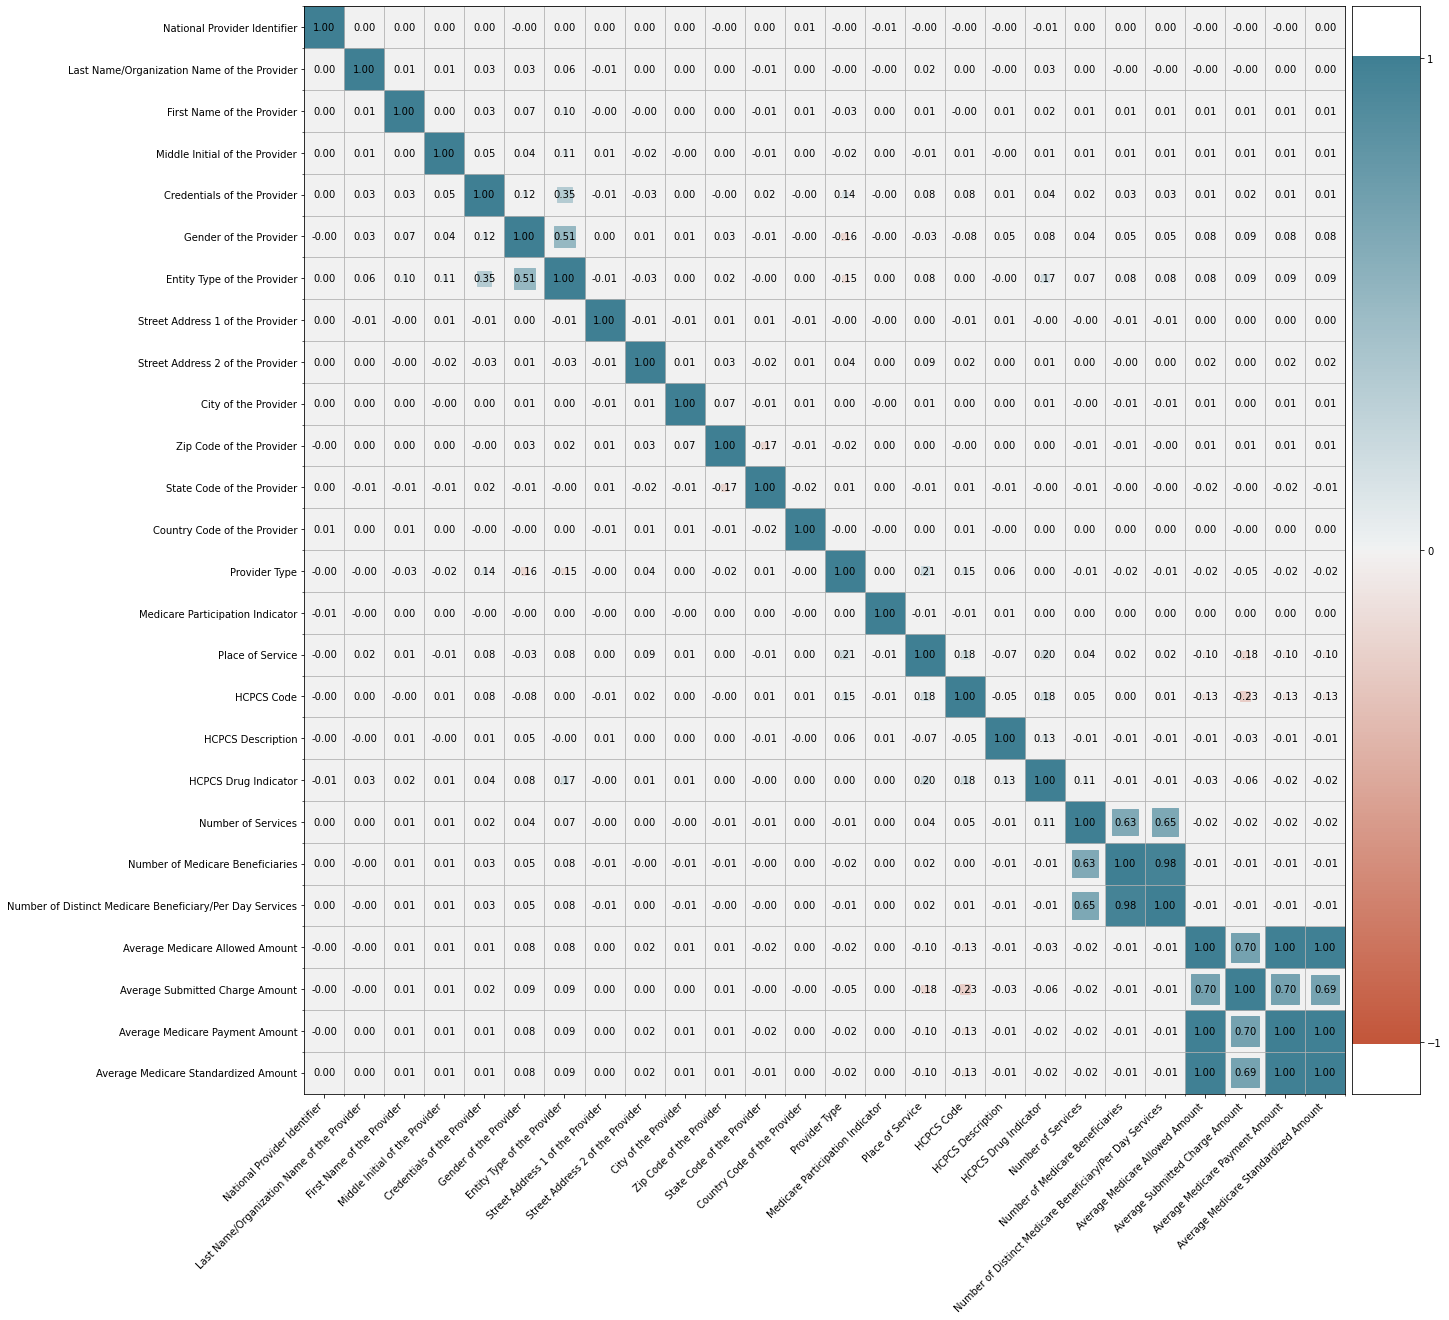

In [19]:
# so, KMeans Isn't working... 
# let's do a heatmap to see if there are any correlations at all
# plot out correlation map
corr = trainData.corr()
plt.figure(figsize=(20, 20))
corrplot(corr,marker="r")

In [14]:
# ok, last try.. lets only pass in the last few numarical columns into KMeans
# just to see what happens
NumData = trainData[trainData.columns.values[range(19,26)]]
NumData

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
76513,-0.083296,-0.058407,-0.067135,-0.394121,-0.319546,-0.387165,-0.389892
60406,-0.078082,-0.040383,-0.059209,0.206949,-0.168972,0.164305,0.244714
27322,-0.089713,-0.067419,-0.076890,-0.074887,-0.192499,-0.064735,-0.066539
53699,-0.054818,0.005579,-0.023848,0.109111,0.415522,0.066670,0.143109
65412,-0.088109,-0.063815,-0.074451,-0.330017,-0.263081,-0.341881,-0.341822
...,...,...,...,...,...,...,...
6265,-0.088510,-0.067419,-0.075061,0.139580,0.086062,0.151770,0.183756
54886,18.253967,-0.051197,-0.049454,-0.390193,-0.328957,-0.383184,-0.385917
76820,-0.079686,-0.068321,-0.061648,-0.291726,-0.300724,-0.298991,-0.290761
860,-0.087708,-0.067419,-0.073841,-0.367298,-0.274986,-0.353242,-0.355274


In [12]:
KMenasTrain(NumData)

Score: -146655.453125 with a k of 5


KMeans(n_clusters=5, random_state=42)

In [14]:
# a lot better than previous base runs, lets find the best k now
GetSilScoresKmeans(NumData)

Score: 0.993343 using k: 2
Score: 0.92757684 using k: 3
Score: 0.9019589 using k: 4
Score: 0.9041555 using k: 5
Score: 0.86736053 using k: 6
Score: 0.6224752 using k: 7
Score: 0.62434936 using k: 8
Score: 0.72677094 using k: 9
Score: 0.6022992 using k: 10
Score: 0.5311421 using k: 11
Score: 0.53141385 using k: 12
Score: 0.4554778 using k: 13
Score: 0.4682575 using k: 14
Score: 0.5404428 using k: 15
Score: 0.467733 using k: 16
Score: 0.46581975 using k: 17
Score: 0.4622606 using k: 18
Score: 0.461284 using k: 19
Score: 0.48412275 using k: 20
Score: 0.41482612 using k: 21
Score: 0.43892 using k: 22
Score: 0.4285605 using k: 23
Score: 0.4394221 using k: 24
Score: 0.4350904 using k: 25
Score: 0.4387598 using k: 26
Score: 0.44025704 using k: 27
Score: 0.44179624 using k: 28
Score: 0.44063216 using k: 29
Score: 0.4414177 using k: 30


In [15]:
# 6 seems like a turning point for the k values, lets use that
kmeans = KMenasTrain(NumData, 6)

Score: -119865.09375 with a k of 6


In [16]:
# granted it's not the best score but lets just see what comes of it
# apply the labels to the orginal encoded data
KClusteredData = trainData.copy()
KClusteredData["clusters"] = kmeans.labels_

# add the unscaled numbers back
#KClusteredData = KClusteredData.assign(**rawData)
KClusteredData = KClusteredData.assign(**NonNullData[NonNullData.columns.values[range(19,26)]].select_dtypes(include=[np.number]))
#KClusteredData = KClusteredData.drop("index",axis=1)
KClusteredData

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,clusters
76513,65956,29051,9066,19,616,0,0,46028,8165,2849,...,24,1,32.0,25.0,32.0,0.050000,15.000000,0.035000,0.035000,0
60406,51250,9426,12517,23,667,1,0,37348,8184,410,...,1519,0,45.0,45.0,45.0,154.669998,175.000000,110.173332,126.984444,0
27322,16893,38918,5268,3,1595,0,0,3956,4754,3852,...,699,0,16.0,15.0,16.0,82.169998,150.000000,64.430000,64.720001,0
53699,24330,11042,6862,15,667,1,0,45030,4754,4834,...,1365,0,103.0,96.0,103.0,129.502136,796.085510,90.674080,106.658936,0
65412,16402,7336,5348,9,667,1,0,40867,4754,2600,...,2044,0,20.0,19.0,20.0,16.540001,75.000000,9.079000,9.651000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,23253,7407,3304,21,322,0,0,50847,4754,829,...,672,0,19.0,15.0,19.0,137.339996,446.000000,107.669998,114.790001,0
54886,59716,10464,3105,3,956,1,0,33673,4754,1585,...,1075,1,45750.0,33.0,61.0,1.060246,5.000000,0.830100,0.830100,5
76820,76529,29749,11097,3,296,1,0,14198,4754,2449,...,397,0,41.0,14.0,41.0,26.389999,35.000000,17.644878,19.865610,0
860,37881,4669,5885,22,956,1,0,1648,4754,5697,...,1390,0,21.0,15.0,21.0,6.950000,62.349998,6.810000,6.960000,0


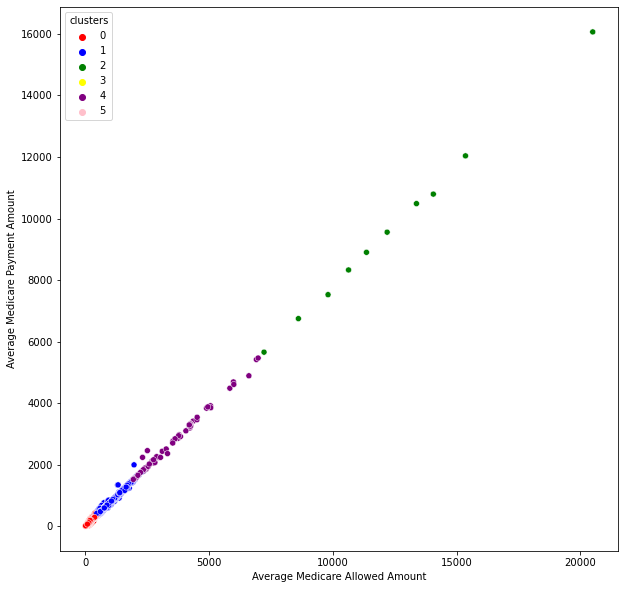

In [17]:
# lets try and see what thsese clusters are, first let's try a scatterplot to show the data
# looking at the heatmap from before we can get the best 2 correlated features
plotData = KClusteredData[KClusteredData.columns.values[[22,24,26]]]

# lets supply some distinctive colors
Colors = ["red","blue","green","yellow","purple","pink"]

# plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x=plotData.columns.values[0], y=plotData.columns.values[1], palette=Colors, hue=plotData.columns.values[2], data=plotData)
plt.show()

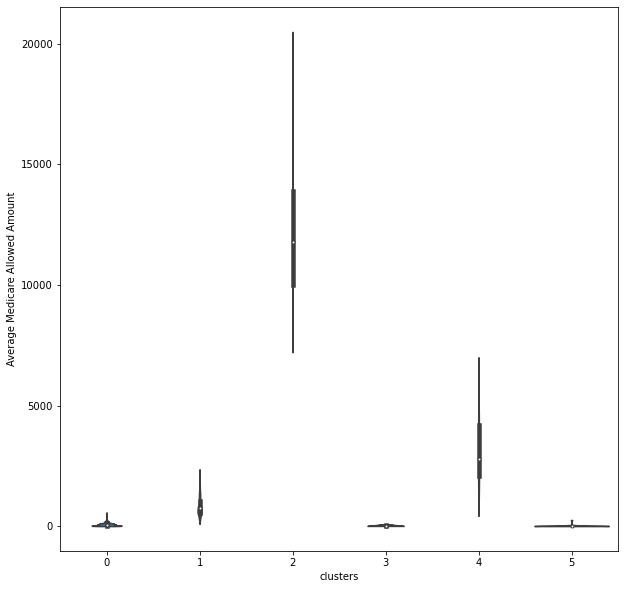

In [18]:
# there are some distinceive groups, hurray
# lets find out more about these groups by doing some plots
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=plotData.columns.values[2], y=plotData.columns.values[0], data=plotData, cut = 0)
plt.show()

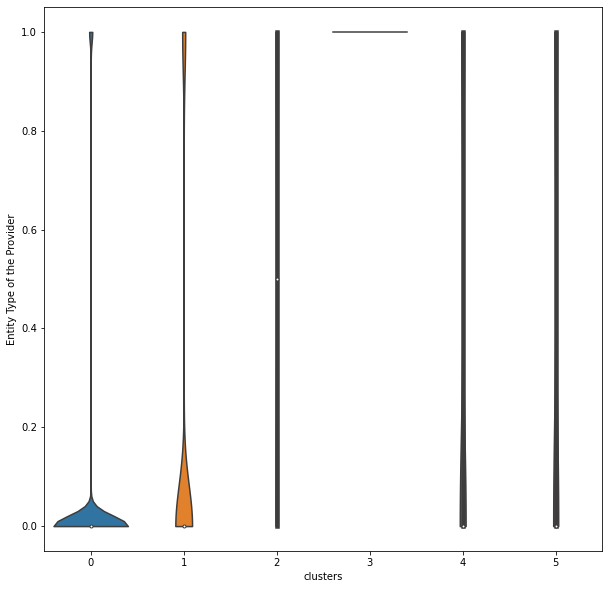

In [19]:
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=KClusteredData.columns.values[26], y=KClusteredData.columns.values[6], data=KClusteredData, cut = 0)
plt.show()

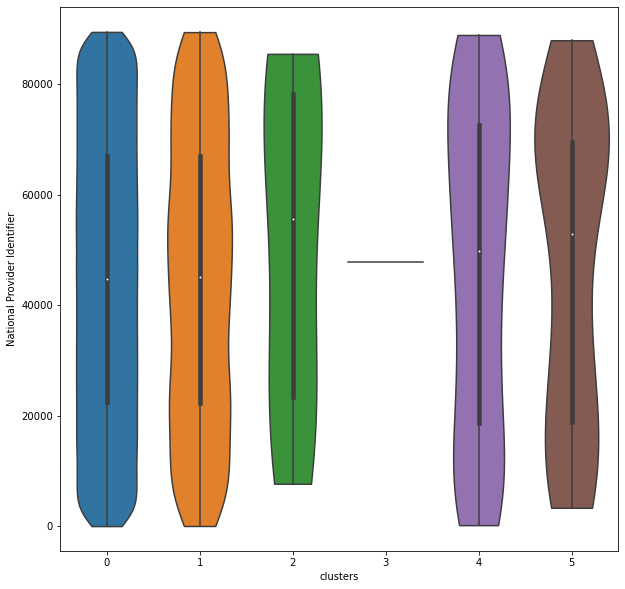

In [20]:
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=KClusteredData.columns.values[26], y=KClusteredData.columns.values[0], data=KClusteredData, cut = 0)
plt.show()

In [21]:
# cluster 3 doesn't have much in it, lets look at all the recrods for
# cluster 3
KClusteredData[KClusteredData[KClusteredData.columns.values[26]]==3]

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,clusters
77440,47794,21210,7941,17,1398,2,1,10400,4754,625,...,473,0,193400.0,143200.0,192993.0,7.099334,53.889439,6.950497,6.959876,3
97943,47794,21210,7941,17,1398,2,1,10400,4754,625,...,300,0,254096.0,172448.0,254081.0,9.749703,39.887505,9.550000,9.554715,3
58126,47794,21210,7941,17,1398,2,1,10400,4754,625,...,2179,0,136388.0,89393.0,136388.0,75.209824,118.503334,73.700035,78.098434,3
12651,47794,21210,7941,17,1398,2,1,10400,4754,625,...,234,0,115109.0,82940.0,114997.0,11.040547,28.535681,10.814133,10.879106,3


In [1]:
# looks like national provider 47794 was all that was chosen, it that all
# 47794 rows?
KClusteredData[KClusteredData[KClusteredData.columns.values[0]]==1538144910]

NameError: name 'KClusteredData' is not defined

In [23]:
# lets do some more exploration fo the different columns in the clusters
def BakePies(dataColumn,NumCols,NumRows,figSize = (15,10),Title = "Cluster Data for Cluster:", colors = []):
    fig, plots = plt.subplots(NumRows,NumCols,figsize=figSize)
    # get pie data

        
    
    # show pie data
    if NumCols == 1:
        for i in range(NumRows):
            plotData = KClusteredData[KClusteredData[KClusteredData.columns.values[26]]==i]
            totals = plotData[plotData.columns.values[dataColumn]].value_counts()
            psum = totals.values.sum()
            pthreshold = psum * 0.02
            others = sum(v for v in totals.values if v < pthreshold)
            if others > 0:
                totals = totals.drop(totals[totals.values < pthreshold].index)
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                totals[len(labels)] = others
                labels = np.append(labels,"Others")
            else:
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())

            plotColors = []
            if not len(colors) == 0:
                for color in totals.keys():
                    plotColors.append(colors[color])
                patches, texts, autotexts = plots[i].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
            else:
                patches, texts, autotexts = plots[i].pie(totals,labels=labels,autopct='%1.1f%%')
            for text in range(len(texts)):
                texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                autotexts[text].set_text("")
            plots[i].set_title(Title + str(i),size=16)
        plt.show()
    elif NumRows == 1:
        for i in range(NumCols):
            plotData = KClusteredData[KClusteredData[KClusteredData.columns.values[26]]==i]
            totals = plotData[plotData.columns.values[dataColumn]].value_counts()
            psum = totals.values.sum()
            pthreshold = psum * 0.02
            others = sum(v for v in totals.values if v < pthreshold)
            if others > 0:
                totals = totals.drop(totals[totals.values < pthreshold].index)
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                totals[len(labels)] = others
                labels = np.append(labels,"Others")
            else:
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())

            plotColors = []
            if not len(colors) == 0:
                for color in totals.keys():
                    plotColors.append(colors[color])
                patches, texts, autotexts = plots[i].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
            else:
                patches, texts, autotexts = plots[i].pie(totals,labels=labels,autopct='%1.1f%%')
            for text in range(len(texts)):
                texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                autotexts[text].set_text("")
            plots[i].set_title(Title + str(i),size=16)
        plt.show()
    else:
        for i in range(NumRows):
            for a in range(NumCols):
                plotData = KClusteredData[KClusteredData[KClusteredData.columns.values[26]]==(i*NumCols)+(a)]
                totals = plotData[plotData.columns.values[dataColumn]].value_counts()
                psum = totals.values.sum()
                pthreshold = psum * 0.02
                others = sum(v for v in totals.values if v < pthreshold)
                if others > 0:
                    totals = totals.drop(totals[totals.values < pthreshold].index)
                    labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                    totals[len(labels)] = others
                    labels = np.append(labels,"Others")
                else:
                    labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                    
                plotColors = []
                if not len(colors) == 0:
                    for color in totals.keys():
                        plotColors.append(colors[color])
                    patches, texts, autotexts = plots[i][a].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
                else:
                    patches, texts, autotexts = plots[i][a].pie(totals,labels=labels,autopct='%1.1f%%')
                for text in range(len(texts)):
                    texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                    autotexts[text].set_text("")
                plots[i][a].set_title(Title + str((i*NumCols)+(a)),size=16)
        plt.show()

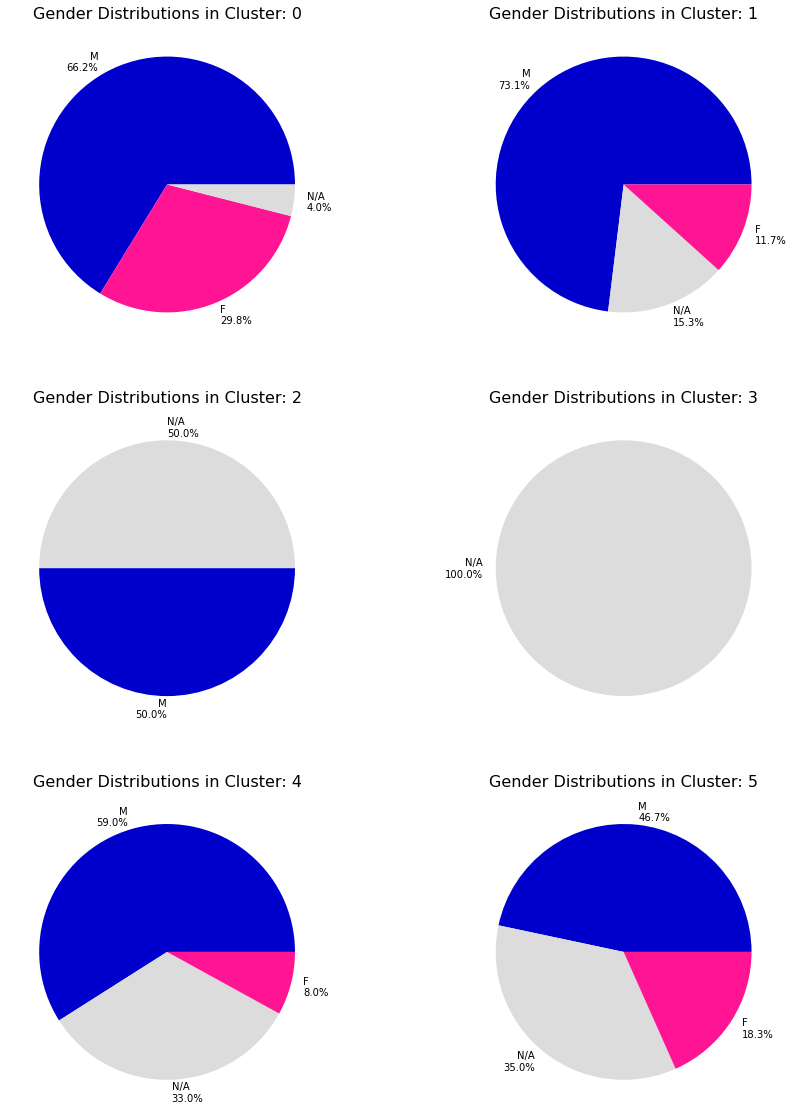

In [24]:
colors = ["deeppink","mediumblue","gainsboro","black"]
BakePies(5,2,3,(15,20),"Gender Distributions in Cluster: ",colors)

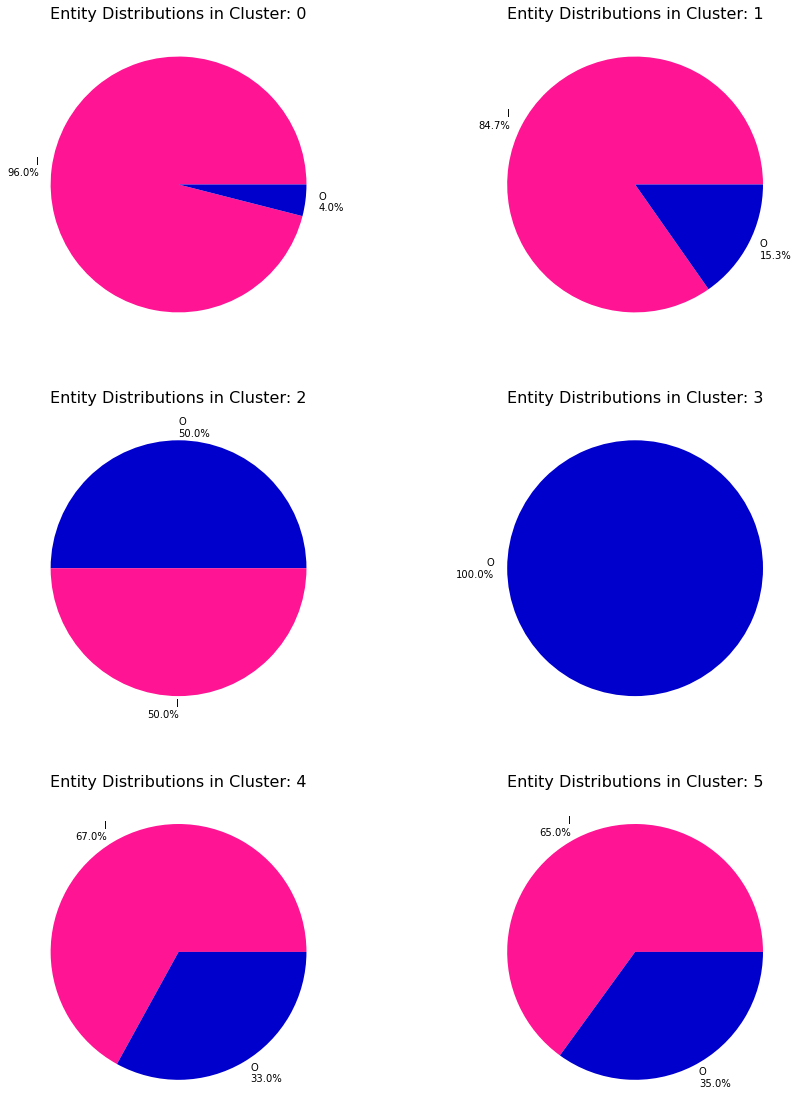

In [25]:
colors = ["deeppink","mediumblue","gainsboro"]
BakePies(6,2,3,(15,20),"Entity Distributions in Cluster: ",colors)

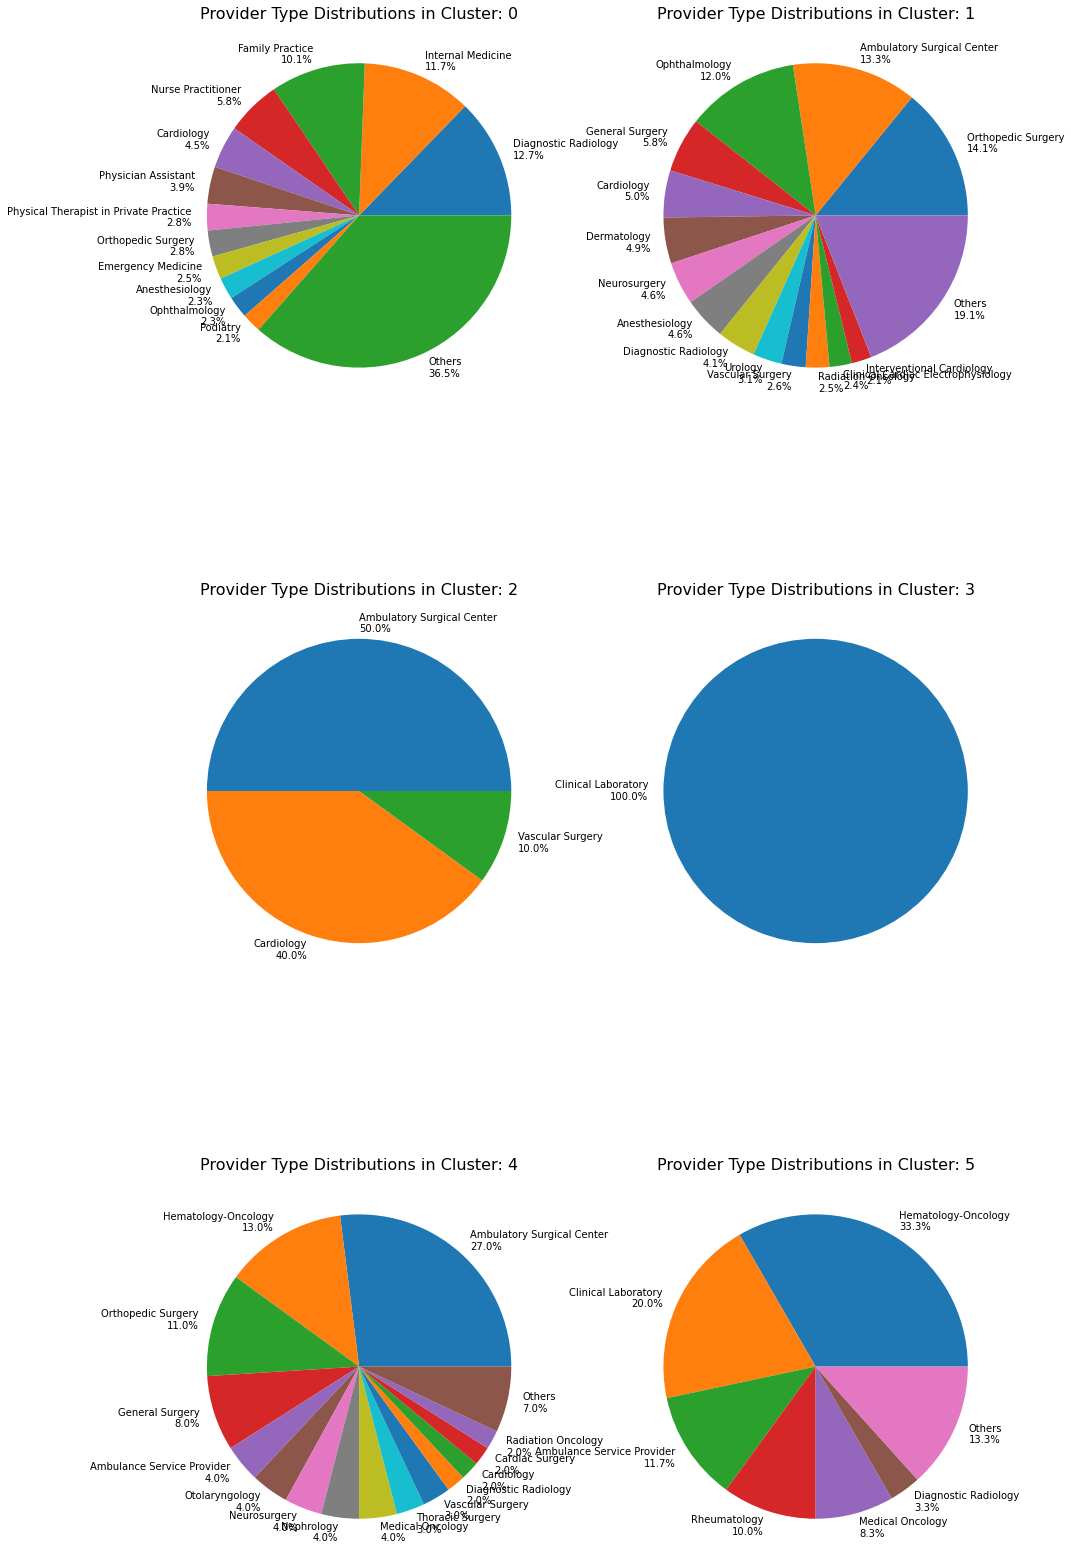

In [42]:
BakePies(13,2,3,(15,30),"Provider Type Distributions in Cluster: ")

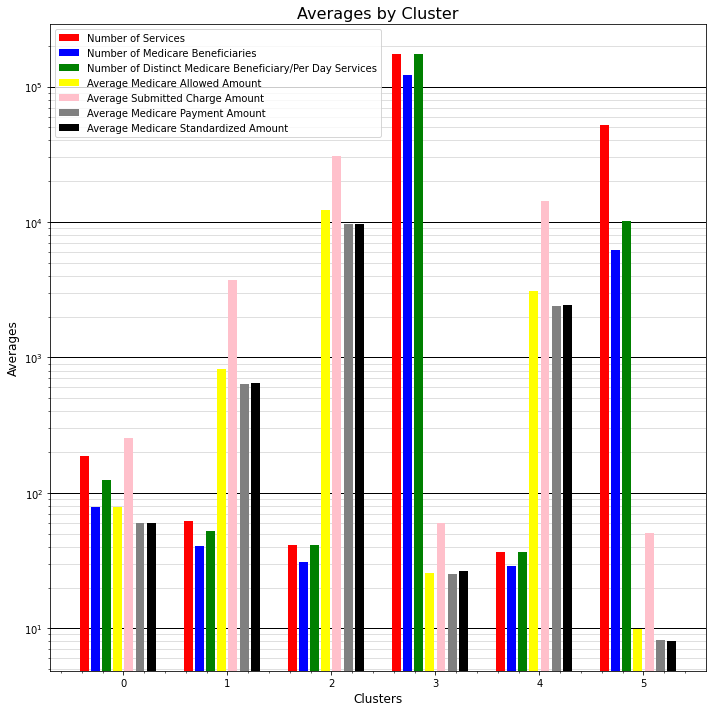

In [27]:
# get averages for numarical data in the clusters
groups = KClusteredData.columns.values[range(19,26)]
colors = ["red","blue","green","yellow","pink","gray","black"]

Averages = []
   
ClusterAverages =[]

for group in range(19,26):
    Averages = []
    for cluster in range(6):       
        Averages.append(KClusteredData[KClusteredData[KClusteredData.columns.values[26]]==cluster][KClusteredData.columns.values[group]].mean(axis=0))
    ClusterAverages.append(Averages)

#plot data
stats = list(range(6))
x = np.arange(len(stats))  # the label locations
width = .75  # the width of the bars

fig, plot = plt.subplots(figsize=(10,10))
for group, color in zip(range(len(groups)),colors):
    averages = ClusterAverages[group]
    ax = plot.bar(x+(group*(width/len(groups))-width/2),
             averages,
             zorder=2,
             color=color,
             label=groups[group],
             width=(width/len(groups))*.8,
             log=True)
    
plot.minorticks_on()
plot.grid(c="black",which='major',linewidth=1,axis='y')   
plot.grid(c="gray",which='minor',linewidth=0.5,alpha=0.5, axis='y')

plot.set_title("Averages by Cluster",size=16)
plot.set_xticks(x)
plot.set_xticklabels(stats)
plot.set_ylabel("Averages",size=12)
plot.set_xlabel("Clusters",size=12)
plot.legend(loc='upper left')
fig.tight_layout()
plt.show()

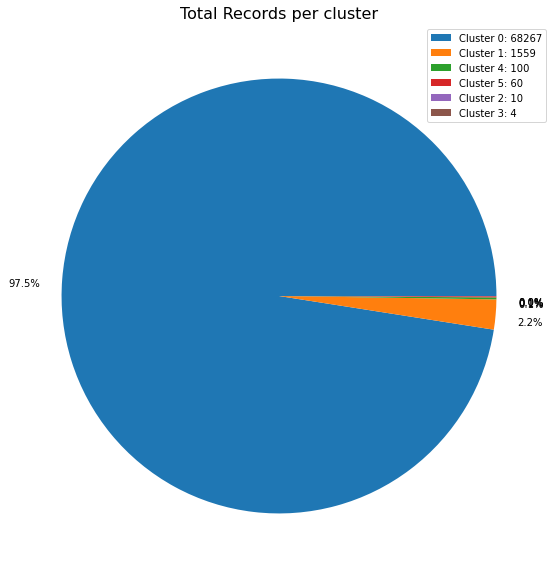

In [28]:

plotData = KClusteredData[KClusteredData.columns.values[26]]
totals = plotData.value_counts()
plt.figure(figsize=(10,10))
labels = []
for key in totals.keys():
    labels.append("Cluster " + str(key) + ": " + str(totals[key]))
patches, texts, autotexts = plt.pie(totals,autopct='%1.1f%%')
for text in range(len(texts)):
    texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
    autotexts[text].set_text("")

plt.title("Total Records per cluster",size=16)
plt.legend(labels)
plt.show()

In [32]:
# lets do a quick prediction of new data
testNumData = testData[testData.columns.values[range(19,26)]]
preditcs = kmeans.predict(testNumData)
PredictData = testData.copy()
PredictData['clusters'] = preditcs
PredictData

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,clusters
75721,77558,19306,5137,6,956,1,0,34647,4754,4744,...,671,0,-0.037571,0.012789,0.002368,-0.017665,-0.198146,-0.109929,-0.058750,0
80184,25025,36474,9090,17,956,0,0,30760,4754,891,...,966,0,-0.088911,-0.064716,-0.075670,0.133555,-0.046631,0.145712,0.154262,0
19864,59370,35461,1728,3,499,0,0,46568,4754,403,...,672,0,-0.062439,-0.012445,-0.035432,-0.014322,-0.161578,-0.003599,-0.014700,0
76699,20148,22421,9662,8,410,1,0,11719,4754,1185,...,1650,1,-0.087307,-0.061111,-0.073231,0.346369,-0.107802,0.547610,0.543358,0
92991,41983,42275,5348,9,667,1,0,29577,8738,1658,...,2390,0,-0.090516,-0.070123,-0.078109,-0.309958,-0.291313,-0.302170,-0.300037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42648,37274,16674,1382,17,1398,1,0,47779,8034,410,...,2118,0,0.871711,0.109219,1.384501,-0.317966,-0.274393,-0.313846,-0.308337,0
86306,29553,8430,6142,4,956,0,0,43486,9118,2606,...,333,0,-0.088510,-0.063815,-0.075061,-0.134052,-0.177374,-0.167135,-0.149665,0
45466,56833,21589,7540,12,322,1,0,8525,4754,78,...,711,0,-0.039176,0.019999,-0.000071,-0.177860,-0.244292,-0.195128,-0.184557,0
63724,4030,41879,2590,4,1048,1,0,2189,8671,2022,...,671,0,0.178619,0.237192,0.330983,0.005737,-0.139799,-0.043833,-0.020221,0


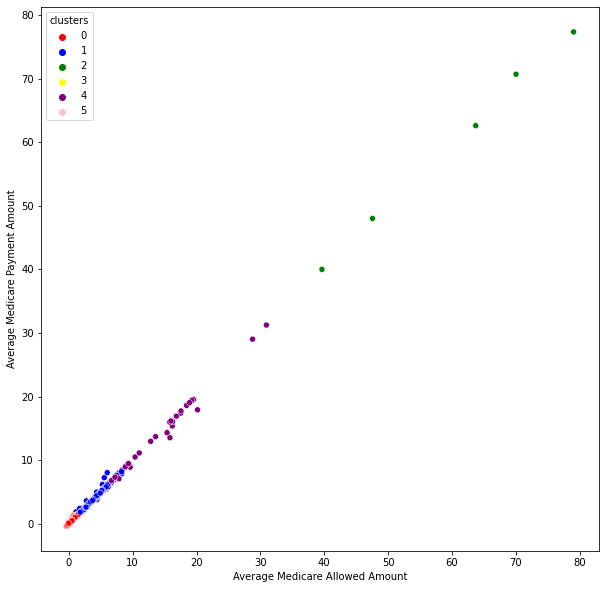

In [33]:
# lets see how well this new data was clustered to the found clsuters
plotData = PredictData[PredictData.columns.values[[22,24,26]]]

# lets supply some distinctive colors
Colors = ["red","blue","green","yellow","purple","pink"]

# plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x=plotData.columns.values[0], y=plotData.columns.values[1], palette=Colors, hue=plotData.columns.values[2], data=plotData)
plt.show()

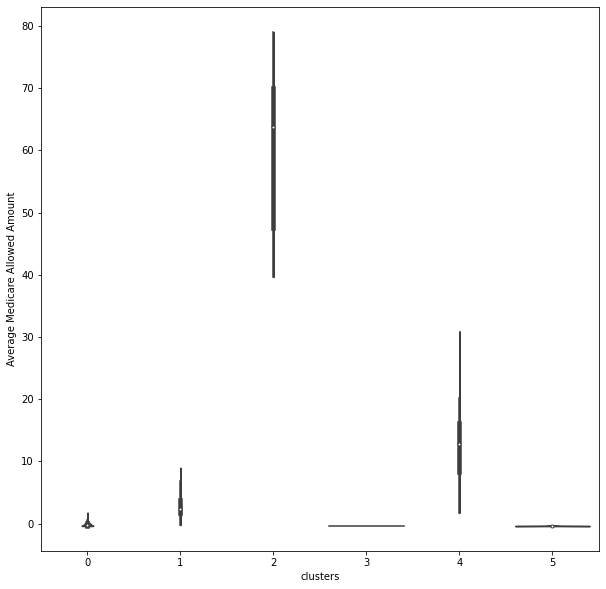

In [34]:
# lets see if this match is really true by doing more exploration
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=plotData.columns.values[2], y=plotData.columns.values[0], data=plotData, cut = 0)
plt.show()

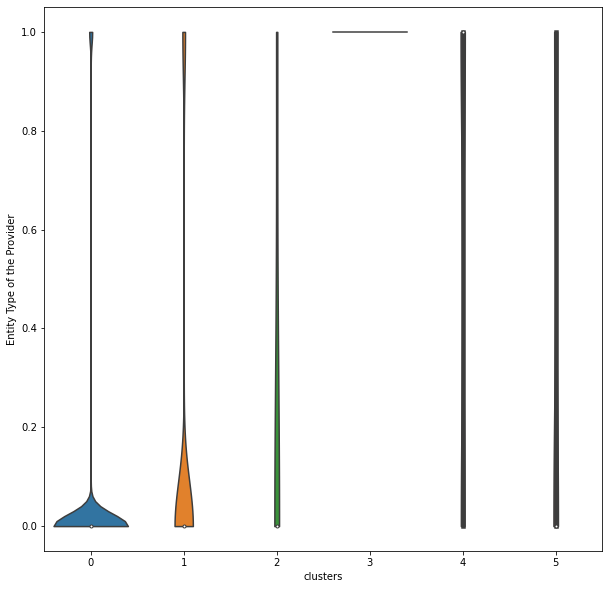

In [35]:
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=PredictData.columns.values[26], y=PredictData.columns.values[6], data=PredictData, cut = 0)
plt.show()

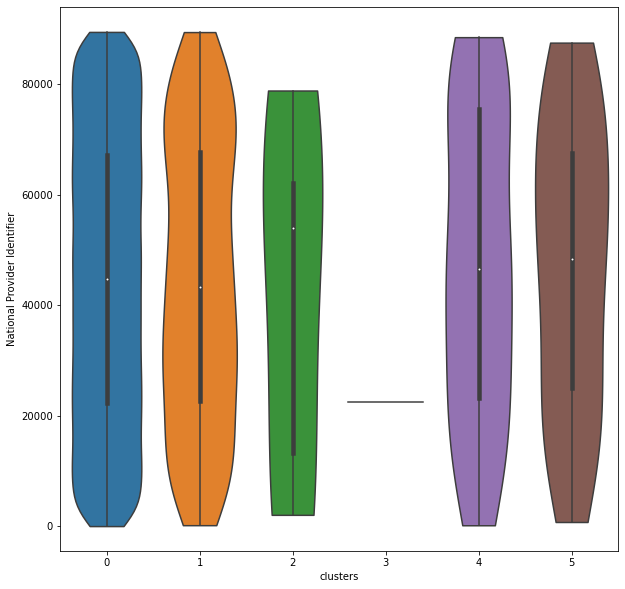

In [36]:
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x=PredictData.columns.values[26], y=PredictData.columns.values[0], data=PredictData, cut = 0)
plt.show()

In [37]:
# everything is looking the same, lets just show this is different data
PredictData[PredictData[PredictData.columns.values[26]]==3]

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,clusters
91494,22551,21209,7941,17,1398,2,1,39185,4754,5115,...,303,0,113.30909,171.425964,172.290939,-0.330393,-0.245803,-0.30672,-0.309508,3


In [38]:
# going to need a new "BakePies" function for the test data
# should have generalized this more... oh well..
def BakeTestPies(dataColumn,NumCols,NumRows,figSize = (15,10),Title = "Cluster Data for Cluster:", colors = []):
    fig, plots = plt.subplots(NumRows,NumCols,figsize=figSize)
    # get pie data

        
    
    # show pie data
    if NumCols == 1:
        for i in range(NumRows):
            plotData = PredictData[PredictData[PredictData.columns.values[26]]==i]
            totals = plotData[plotData.columns.values[dataColumn]].value_counts()
            psum = totals.values.sum()
            pthreshold = psum * 0.02
            others = sum(v for v in totals.values if v < pthreshold)
            if others > 0:
                totals = totals.drop(totals[totals.values < pthreshold].index)
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                totals[len(labels)] = others
                labels = np.append(labels,"Others")
            else:
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())

            plotColors = []
            if not len(colors) == 0:
                for color in totals.keys():
                    plotColors.append(colors[color])
                patches, texts, autotexts = plots[i].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
            else:
                patches, texts, autotexts = plots[i].pie(totals,labels=labels,autopct='%1.1f%%')
            for text in range(len(texts)):
                texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                autotexts[text].set_text("")
            plots[i].set_title(Title + str(i),size=16)
        plt.show()
    elif NumRows == 1:
        for i in range(NumCols):
            plotData = PredictData[PredictData[PredictData.columns.values[26]]==i]
            totals = plotData[plotData.columns.values[dataColumn]].value_counts()
            psum = totals.values.sum()
            pthreshold = psum * 0.02
            others = sum(v for v in totals.values if v < pthreshold)
            if others > 0:
                totals = totals.drop(totals[totals.values < pthreshold].index)
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                totals[len(labels)] = others
                labels = np.append(labels,"Others")
            else:
                labels = label_encoders[dataColumn].inverse_transform(totals.keys())

            plotColors = []
            if not len(colors) == 0:
                for color in totals.keys():
                    plotColors.append(colors[color])
                patches, texts, autotexts = plots[i].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
            else:
                patches, texts, autotexts = plots[i].pie(totals,labels=labels,autopct='%1.1f%%')
            for text in range(len(texts)):
                texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                autotexts[text].set_text("")
            plots[i].set_title(Title + str(i),size=16)
        plt.show()
    else:
        for i in range(NumRows):
            for a in range(NumCols):
                plotData = PredictData[PredictData[PredictData.columns.values[26]]==(i*NumCols)+(a)]
                totals = plotData[plotData.columns.values[dataColumn]].value_counts()
                psum = totals.values.sum()
                pthreshold = psum * 0.02
                others = sum(v for v in totals.values if v < pthreshold)
                if others > 0:
                    totals = totals.drop(totals[totals.values < pthreshold].index)
                    labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                    totals[len(labels)] = others
                    labels = np.append(labels,"Others")
                else:
                    labels = label_encoders[dataColumn].inverse_transform(totals.keys())
                    
                plotColors = []
                if not len(colors) == 0:
                    for color in totals.keys():
                        plotColors.append(colors[color])
                    patches, texts, autotexts = plots[i][a].pie(totals,colors=plotColors,labels=labels,autopct='%1.1f%%')
                else:
                    patches, texts, autotexts = plots[i][a].pie(totals,labels=labels,autopct='%1.1f%%')
                for text in range(len(texts)):
                    texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
                    autotexts[text].set_text("")
                plots[i][a].set_title(Title + str((i*NumCols)+(a)),size=16)
        plt.show()

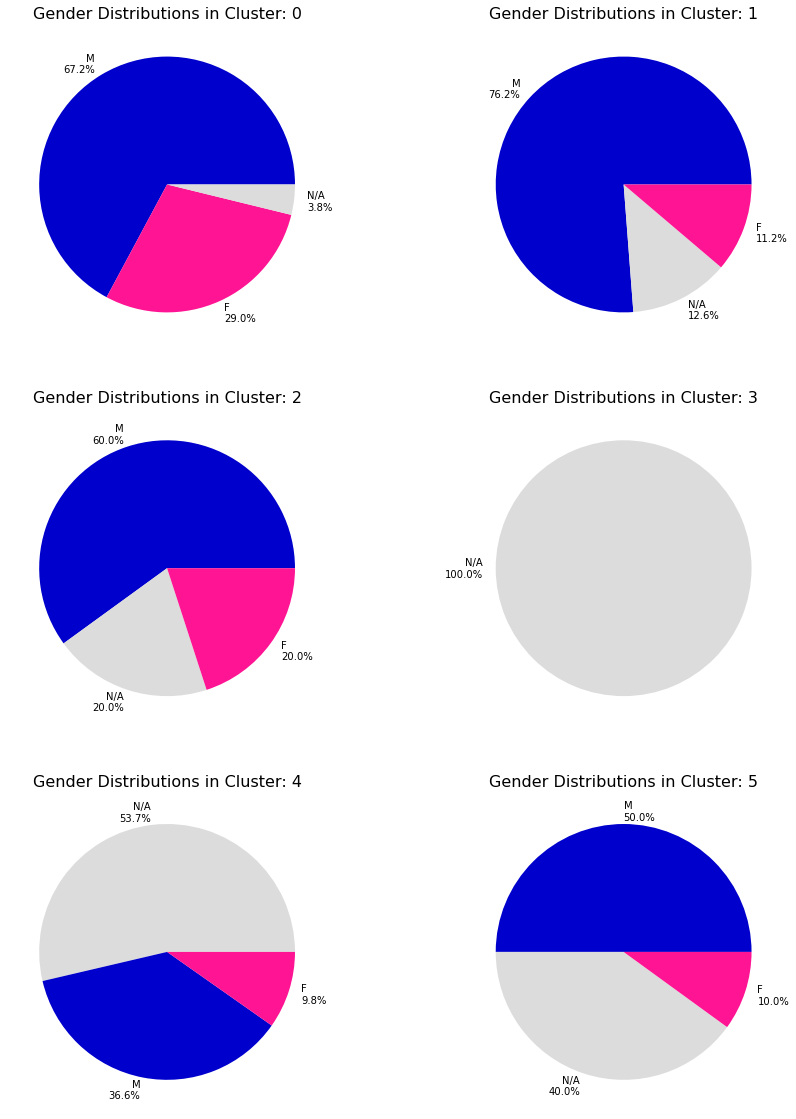

In [39]:
colors = ["deeppink","mediumblue","gainsboro","black"]
BakeTestPies(5,2,3,(15,20),"Gender Distributions in Cluster: ",colors)

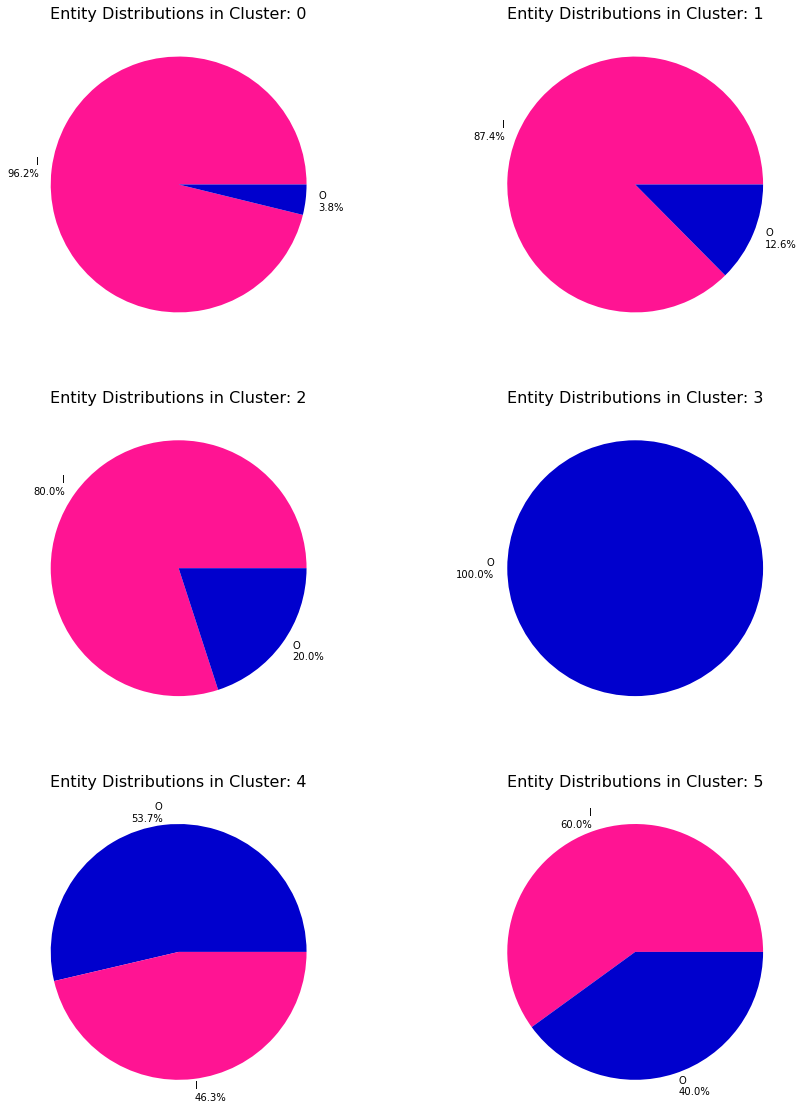

In [40]:
colors = ["deeppink","mediumblue","gainsboro"]
BakeTestPies(6,2,3,(15,20),"Entity Distributions in Cluster: ",colors)

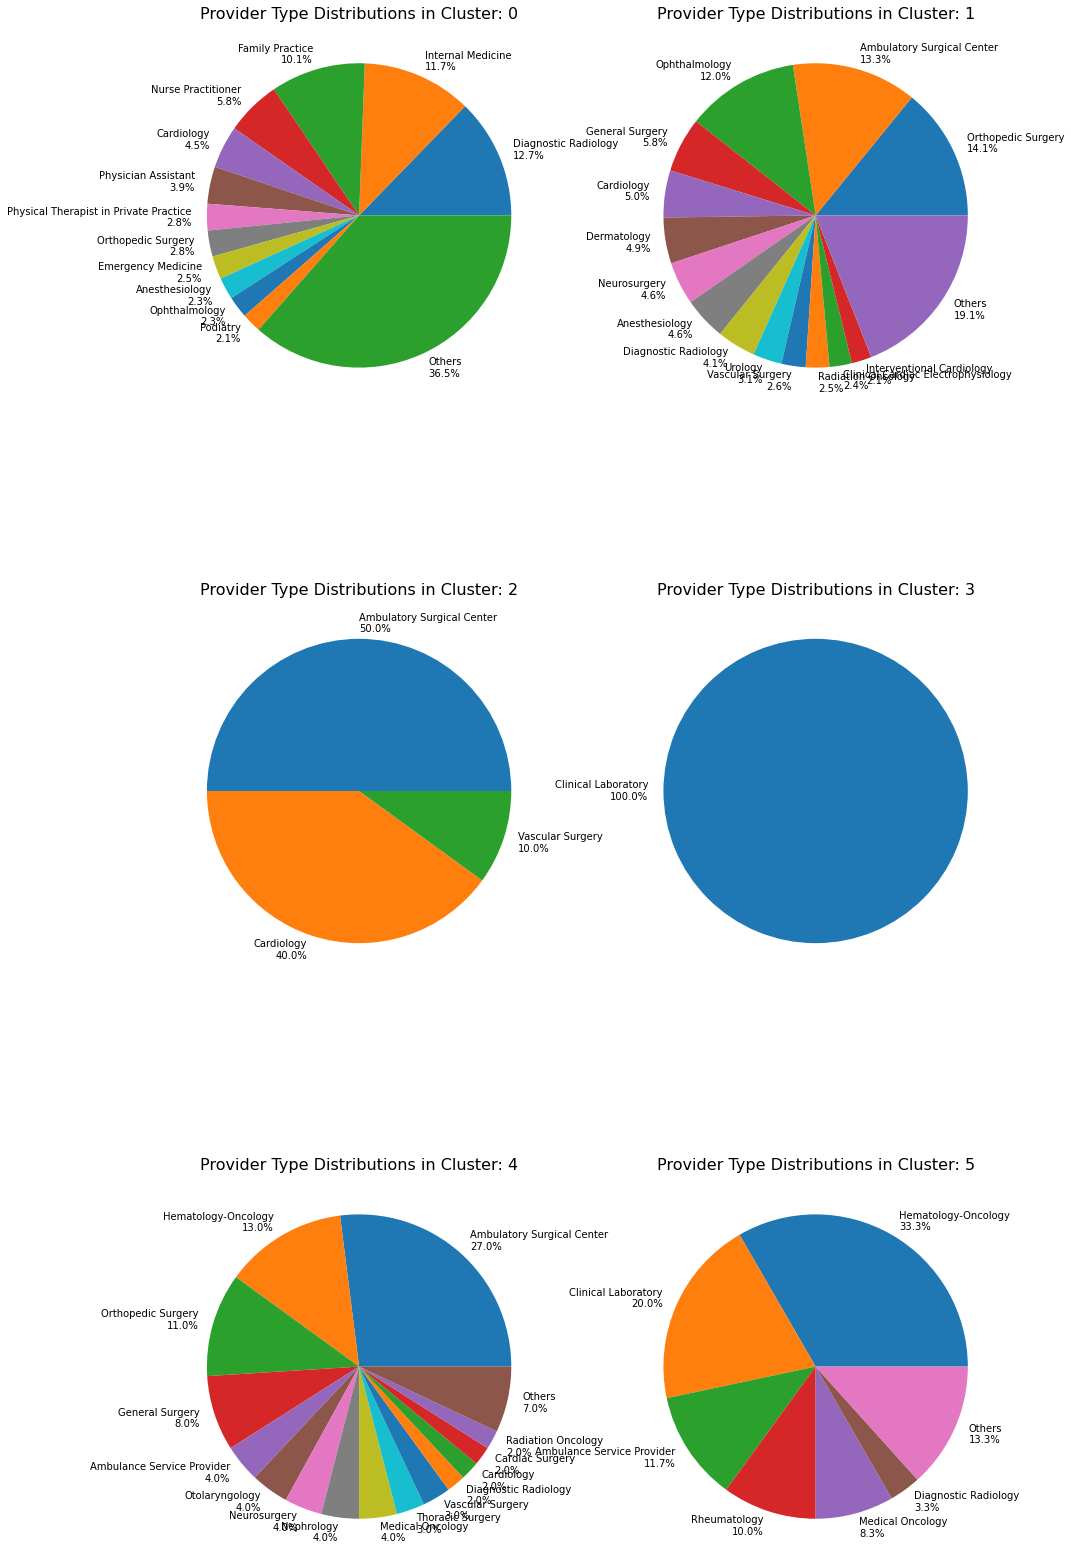

In [41]:
BakePies(13,2,3,(15,30),"Provider Type Distributions in Cluster: ")

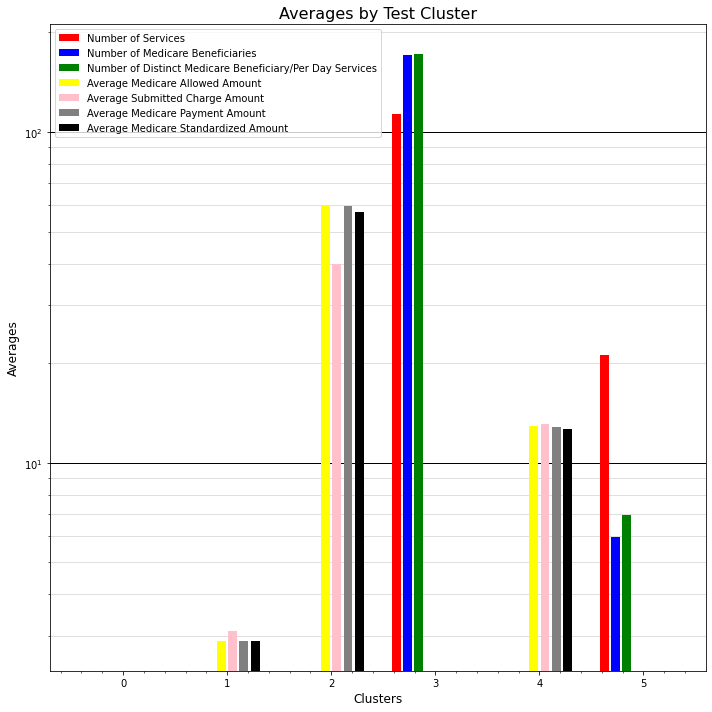

In [43]:
# get averages for numarical data in the test clusters
groups = PredictData.columns.values[range(19,26)]
colors = ["red","blue","green","yellow","pink","gray","black"]

Averages = []
   
ClusterAverages =[]

for group in range(19,26):
    Averages = []
    for cluster in range(6):       
        Averages.append(PredictData[PredictData[PredictData.columns.values[26]]==cluster][KClusteredData.columns.values[group]].mean(axis=0))
    ClusterAverages.append(Averages)

#plot data
stats = list(range(6))
x = np.arange(len(stats))  # the label locations
width = .75  # the width of the bars

fig, plot = plt.subplots(figsize=(10,10))
for group, color in zip(range(len(groups)),colors):
    averages = ClusterAverages[group]
    ax = plot.bar(x+(group*(width/len(groups))-width/2),
             averages,
             zorder=2,
             color=color,
             label=groups[group],
             width=(width/len(groups))*.8,
             log=True)
    
plot.minorticks_on()
plot.grid(c="black",which='major',linewidth=1,axis='y')   
plot.grid(c="gray",which='minor',linewidth=0.5,alpha=0.5, axis='y')

plot.set_title("Averages by Test Cluster",size=16)
plot.set_xticks(x)
plot.set_xticklabels(stats)
plot.set_ylabel("Averages",size=12)
plot.set_xlabel("Clusters",size=12)
plot.legend(loc='upper left')
fig.tight_layout()
plt.show()

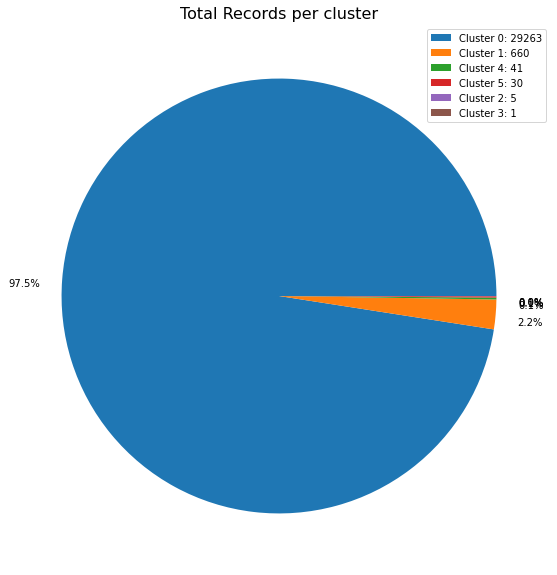

In [44]:
plotData = PredictData[PredictData.columns.values[26]]
totals = plotData.value_counts()
plt.figure(figsize=(10,10))
labels = []
for key in totals.keys():
    labels.append("Cluster " + str(key) + ": " + str(totals[key]))
patches, texts, autotexts = plt.pie(totals,autopct='%1.1f%%')
for text in range(len(texts)):
    texts[text].set_text(texts[text].get_text() + "\n" + autotexts[text].get_text())
    autotexts[text].set_text("")

plt.title("Total Records per cluster",size=16)
plt.legend(labels)
plt.show()

There you have it. Most of the pie charts and the graphs show tons of similarities. Showing that new data is getting clustered well. There are some inconsistencies but I attribute that to slightly differences in the data that weren’t part of the clustering parameters and the fact that there is less data altogether.